# Convergence curves

In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import matplotlib.pyplot as plt
import cPickle as pickle
import os
import matplotlib as mpb

from fatiando import utils
from fatiando.gravmag import polyprism
from fatiando.gravmag.transform import reduce_to_pole
from fatiando.mesher import PolygonalPrism
from fatiando.vis import mpl, myv
from matplotlib import colors, ticker, cm
from IPython.display import Image as img
from matplotlib.mlab import normpdf
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

/home/leo/anaconda2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")
/home/leo/anaconda2/lib/python2.7/site-packages/fatiando/vis/myv.py:51: UserWarning: This module will be removed in v0.7.
  warnings.warn("This module will be removed in v0.7.")


In [2]:
import sys
sys.path.insert(0, '../../code')

import mag_polyprism_functions as mfun
import mag_sphere_functions as msf

In [3]:
mypath = 'data/flightlines_grid_2100pts_100k/tfa_inversion/multiple_int_min6_int_max11_z0_min-50_z0_max200/'

In [4]:
with open(mypath+'inversion.pickle') as w:
        di = pickle.load(w)

In [5]:
with open('data/model.pickle') as w:
        model = pickle.load(w)

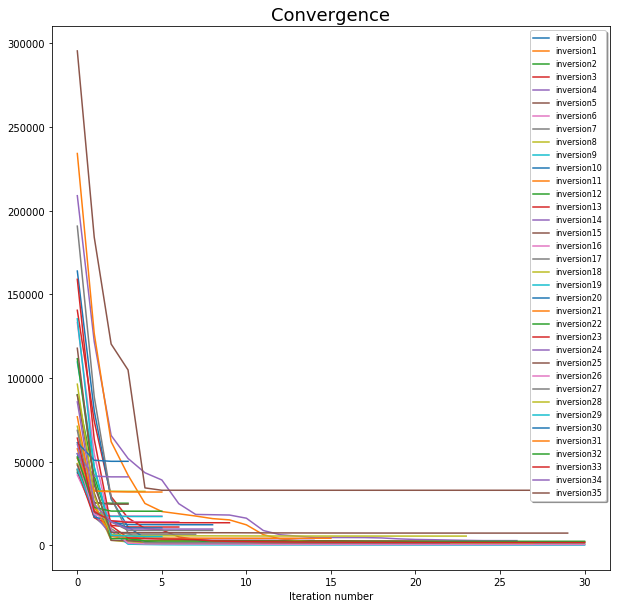

In [6]:
plt.figure(figsize=(10,10))
plt.title('Convergence', fontsize = 18)
plt.xlabel('Iteration number')
for i, phi in enumerate(di['results']):
    plt.plot(phi[3], label='inversion%d' % (i))
plt.legend(loc=0, fontsize=8, shadow=bool, framealpha=1)

plt.savefig(mypath+'_tfa_convergence.png', dpi=300)
plt.show()

In [12]:
z0 = di['z0']
intensity = di['intensity']
z0_plot, int_plot = np.meshgrid(z0, intensity)
z0_plot = z0_plot.ravel()
int_plot = int_plot.ravel()
n = z0.size
m = intensity.size
N = di['x'].size

In [13]:
matrix_gamma = np.zeros((n,m))
for i in range(n):
    for j in range(m):
        matrix_gamma[i, j] = di['results'][i*n+j][3][-1]

In [14]:
matrix_gamma

array([[12230.56227416,  2689.22686151,   651.74906913,  1970.9753887 ,
         2747.224269  , 32838.23071234],
       [17422.87371851,  6598.62946992,   896.35175271,    70.8752555 ,
         1094.96982211,  1876.61950438],
       [25092.97457289, 10876.64626343,  3919.25020523,  1224.32974086,
          448.24433908,  1542.36415154],
       [32200.96111244, 17138.76284319, 10313.38363944,  4153.90007111,
         2337.32925104,  1585.26971617],
       [40843.54949697, 24516.28342303, 14037.02975228,  8816.73907658,
         5452.15821452,  5196.25202609],
       [50142.39461199, 31781.35942457, 20319.90574149, 13426.77093198,
         9656.08018988,  7237.6194381 ]])

In [15]:
matrix_phi = np.zeros((n,m))
for i in range(n):
    for j in range(m):
        matrix_phi[i, j] = np.linalg.norm(di['results'][i*n+j][6][-1], 2)**2./N

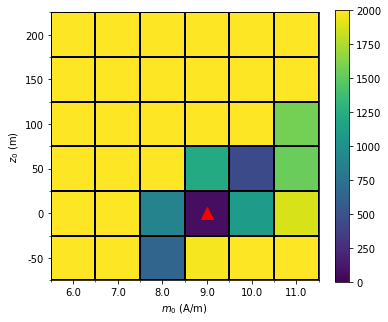

In [28]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(6,5)
img = ax.imshow(matrix_gamma, vmin=0, vmax=2000, origin='lower',extent=[0,1,0,1])
plt.plot(0.583333, 0.25, '^r', markersize=12)
plt.ylabel('$z_0$ (m)')
plt.xlabel('$m_0$ (A/m)')
x_label_list = []
y_label_list = []
for xl, yl in zip(intensity,z0):
    x_label_list.append(str(xl))
    y_label_list.append(str(yl)[:-2])
ax.set_xticks(np.linspace(1./(2.*n), 1 - 1./(2.*n), 6))
ax.set_yticks(np.linspace(1./(2.*m), 1 - 1./(2.*m), 6))
ax.set_xticklabels(x_label_list)
ax.set_yticklabels(y_label_list)
# Minor ticks
ax.set_xticks(np.linspace(0, 1, 7), minor=True);
ax.set_yticks(np.linspace(0, 1, 7), minor=True);
ax.grid(which='minor', color='k', linewidth=2.)
plt.colorbar(img)
plt.savefig(mypath+'_obj_func_map.png', dpi=300, bbox_inches="tight")
plt.show()

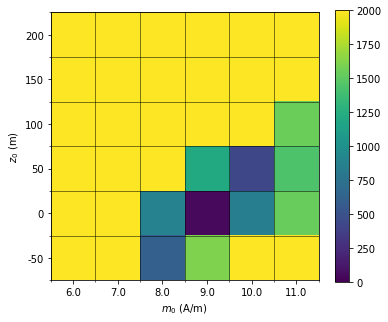

In [23]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(6,5)
img = ax.imshow(matrix_phi, vmin=0, vmax=2000, origin='lower',extent=[0,1,0,1])
plt.ylabel('$z_0$ (m)')
plt.xlabel('$m_0$ (A/m)')
x_label_list = []
y_label_list = []
for xl, yl in zip(intensity,z0):
    x_label_list.append(str(xl))
    y_label_list.append(str(yl)[:-2])
ax.set_xticks(np.linspace(1./(2.*n), 1 - 1./(2.*n), 6))
ax.set_yticks(np.linspace(1./(2.*m), 1 - 1./(2.*m), 6))
ax.set_xticklabels(x_label_list)
ax.set_yticklabels(y_label_list)
# Minor ticks
ax.set_xticks(np.linspace(0, 1, 7), minor=True);
ax.set_yticks(np.linspace(0, 1, 7), minor=True);
ax.grid(which='minor', color='k', linewidth=0.5)
plt.colorbar(img)
plt.savefig(mypath+'_obj_func_map.png', dpi=300, bbox_inches="tight")
plt.show()

# Inversion 9

/home/leo/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


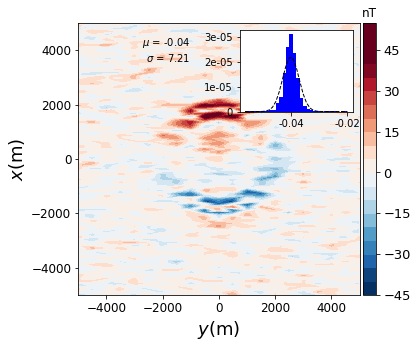

In [79]:
plt.figure(figsize=(6,5))
ax=mpl.subplot(1,1,1)
#plt.title('Residual', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.min(di['results'][9][-2]), vmax=np.min(di['results'][9][-2])*(-1))
plt.tricontourf(di['y'], di['x'], di['results'][9][-2], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=18)
plt.ylabel('$x$(m)', fontsize=18)
plt.xlim(np.min(di['x']), np.max(di['x']))
plt.ylim(np.min(di['y']), np.max(di['y']))
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.set_title('nT')
clb.ax.tick_params(labelsize=13)
inset = inset_axes(ax, width="40%", height="30%", loc=1, borderpad=0.7)
mean = np.mean(di['results'][9][-2])
std = np.std(di['results'][9][-2])
nbins=30
n, bins, patches = plt.hist(di['results'][9][-2],bins=nbins, normed=True, facecolor='blue')
plt.text(0.4, 0.96, "$\mu$ = {:.2f}\n$\sigma$ = {:.2f}".format(mean, std), 
         horizontalalignment='right',
         verticalalignment='top',
         transform = ax.transAxes, fontsize=10)
gauss = normpdf(bins, mean, std)
plt.plot(bins, gauss, 'k--', linewidth=1., label='Gaussian')
mpl.m2km()
plt.show()

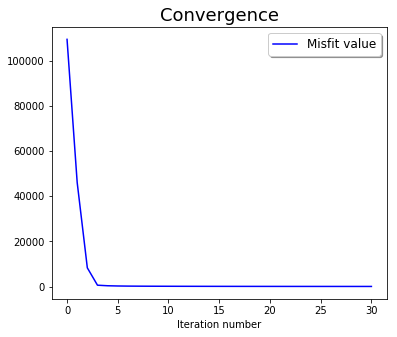

In [80]:
plt.figure(figsize=(6,5))
plt.title('Convergence', fontsize = 18)
plt.xlabel('Iteration number')
plt.plot(di['results'][9][3], 'b-', label='Misfit value')
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1)
plt.show()

In [81]:
verts13 = mfun.plot_prisms(di['results'][9][2])
verts_true = mfun.plot_prisms(model['prisms'])

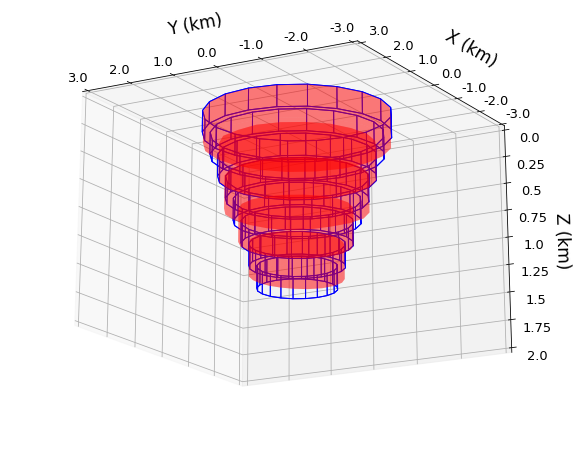

In [83]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts_true, 
alpha=0, facecolor='b', linewidths=1., edgecolors='b'))
ax.add_collection3d(Poly3DCollection(verts13, alpha=0.3, 
 facecolor='r', linewidths=0, edgecolors='r'))

ax.set_xlim(-3000, 3000, 100)
ax.set_ylim(-3000, 3000, 100)
ax.set_zlim(2000, 0, 100)
ax.tick_params(labelsize= 13, pad=8)
ax.set_xlabel('Y (km)', fontsize= 17)
ax.set_ylabel('X (km)', fontsize= 17)
ax.set_zlabel('Z (km)', fontsize= 17)
ax.set_xticklabels(np.linspace(-3, 3, 7))
ax.set_yticklabels(np.linspace(-3, 3, 7))
ax.set_zticklabels(np.linspace(0, 2, 9))
ax.yaxis.labelpad=13
ax.zaxis.labelpad=13
ax.xaxis.labelpad=13
ax.view_init(-20, 120)
ax.autoscale_view()

plt.show()

# Inversion 11

/home/leo/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


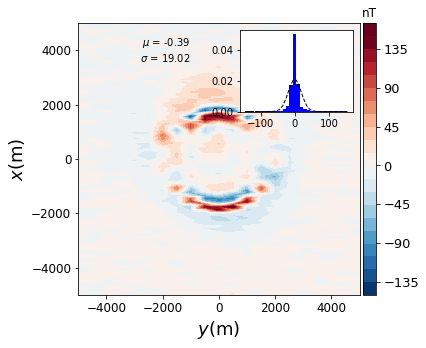

In [84]:
plt.figure(figsize=(6,5))
ax=mpl.subplot(1,1,1)
#plt.title('Residual', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.min(di['results'][11][-2]), vmax=np.min(di['results'][11][-2])*(-1))
plt.tricontourf(di['y'], di['x'], di['results'][11][-2], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=18)
plt.ylabel('$x$(m)', fontsize=18)
plt.xlim(np.min(di['x']), np.max(di['x']))
plt.ylim(np.min(di['y']), np.max(di['y']))
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.set_title('nT')
clb.ax.tick_params(labelsize=13)
inset = inset_axes(ax, width="40%", height="30%", loc=1, borderpad=0.7)
mean = np.mean(di['results'][11][-2])
std = np.std(di['results'][11][-2])
nbins=30
n, bins, patches = plt.hist(di['results'][11][-2],bins=nbins, normed=True, facecolor='blue')
plt.text(0.4, 0.96, "$\mu$ = {:.2f}\n$\sigma$ = {:.2f}".format(mean, std), 
         horizontalalignment='right',
         verticalalignment='top',
         transform = ax.transAxes, fontsize=10)
gauss = normpdf(bins, mean, std)
plt.plot(bins, gauss, 'k--', linewidth=1., label='Gaussian')
#mpl.m2km()
plt.savefig(mypath+'kimberlite_tfa_residual.png', dpi=300, bbox_inches="tight")
#plt.show()
#img(filename=mypath+'kimberlite_tfa_residual.png', width=1600, height=400)

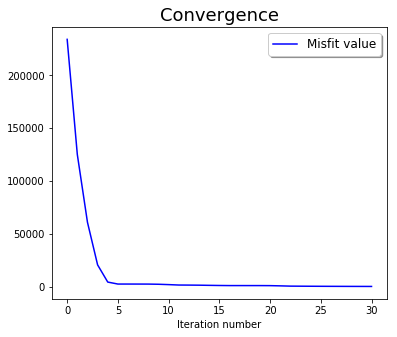

In [85]:
plt.figure(figsize=(6,5))
plt.title('Convergence', fontsize = 18)
plt.xlabel('Iteration number')
plt.plot(di['results'][11][3], 'b-', label='Misfit value')
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1)
plt.show()

In [86]:
verts14 = mfun.plot_prisms(di['results'][11][2])

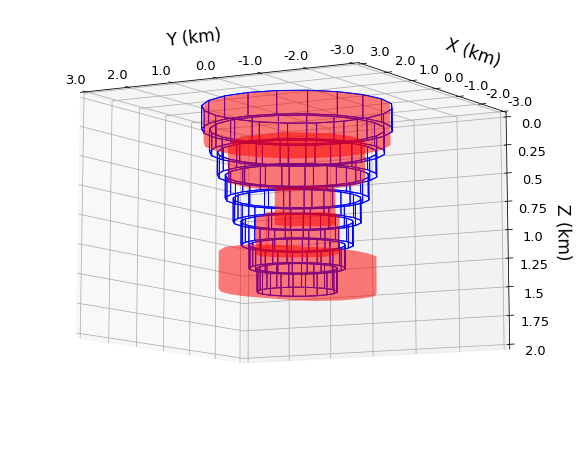

In [87]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts_true, 
alpha=0, facecolor='b', linewidths=1., edgecolors='b'))
ax.add_collection3d(Poly3DCollection(verts14, alpha=0.3, 
 facecolor='r', linewidths=0, edgecolors='r'))

ax.set_xlim(-3000, 3000, 100)
ax.set_ylim(-3000, 3000, 100)
ax.set_zlim(2000, 0, 100)
ax.tick_params(labelsize= 13, pad=8)
ax.set_xlabel('Y (km)', fontsize= 17)
ax.set_ylabel('X (km)', fontsize= 17)
ax.set_zlabel('Z (km)', fontsize= 17)
ax.set_xticklabels(np.linspace(-3, 3, 7))
ax.set_yticklabels(np.linspace(-3, 3, 7))
ax.set_zticklabels(np.linspace(0, 2, 9))
ax.yaxis.labelpad=13
ax.zaxis.labelpad=13
ax.xaxis.labelpad=13
ax.view_init(-10, 120)
ax.autoscale_view()

plt.show()

# Inversion 5

/home/leo/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


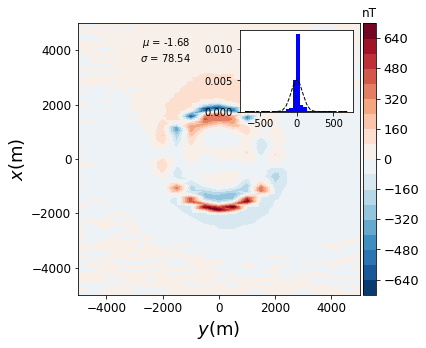

In [88]:
plt.figure(figsize=(6,5))
ax=mpl.subplot(1,1,1)
#plt.title('Residual', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.min(di['results'][5][-2]), vmax=np.min(di['results'][5][-2])*(-1))
plt.tricontourf(di['y'], di['x'], di['results'][5][-2], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=18)
plt.ylabel('$x$(m)', fontsize=18)
plt.xlim(np.min(di['x']), np.max(di['x']))
plt.ylim(np.min(di['y']), np.max(di['y']))
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.set_title('nT')
clb.ax.tick_params(labelsize=13)
inset = inset_axes(ax, width="40%", height="30%", loc=1, borderpad=0.7)
mean = np.mean(di['results'][5][-2])
std = np.std(di['results'][5][-2])
nbins=30
n, bins, patches = plt.hist(di['results'][5][-2],bins=nbins, normed=True, facecolor='blue')
plt.text(0.4, 0.96, "$\mu$ = {:.2f}\n$\sigma$ = {:.2f}".format(mean, std), 
         horizontalalignment='right',
         verticalalignment='top',
         transform = ax.transAxes, fontsize=10)
gauss = normpdf(bins, mean, std)
plt.plot(bins, gauss, 'k--', linewidth=1., label='Gaussian')
#mpl.m2km()
plt.savefig(mypath+'kimberlite_tfa_residual.png', dpi=300, bbox_inches="tight")
#plt.show()
#img(filename=mypath+'kimberlite_tfa_residual.png', width=1600, height=400)

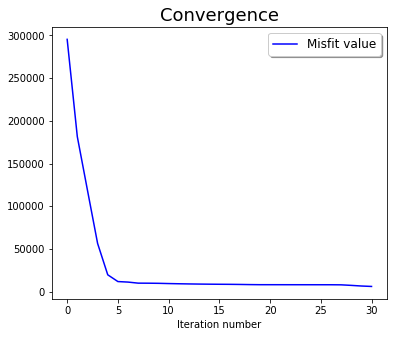

In [89]:
plt.figure(figsize=(6,5))
plt.title('Convergence', fontsize = 18)
plt.xlabel('Iteration number')
plt.plot(di['results'][5][3], 'b-', label='Misfit value')
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1)
plt.show()

In [90]:
verts5 = mfun.plot_prisms(di['results'][5][2])

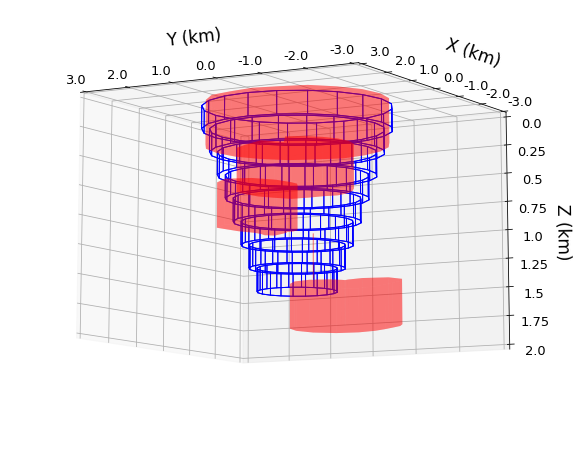

In [91]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts_true, 
alpha=0, facecolor='b', linewidths=1., edgecolors='b'))
ax.add_collection3d(Poly3DCollection(verts5, alpha=0.3, 
 facecolor='r', linewidths=0, edgecolors='r'))

ax.set_xlim(-3000, 3000, 100)
ax.set_ylim(-3000, 3000, 100)
ax.set_zlim(2000, 0, 100)
ax.tick_params(labelsize= 13, pad=8)
ax.set_xlabel('Y (km)', fontsize= 17)
ax.set_ylabel('X (km)', fontsize= 17)
ax.set_zlabel('Z (km)', fontsize= 17)
ax.set_xticklabels(np.linspace(-3, 3, 7))
ax.set_yticklabels(np.linspace(-3, 3, 7))
ax.set_zticklabels(np.linspace(0, 2, 9))
ax.yaxis.labelpad=13
ax.zaxis.labelpad=13
ax.xaxis.labelpad=13
ax.view_init(-10, 120)
ax.autoscale_view()

plt.show()

# Inversion 30

/home/leo/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


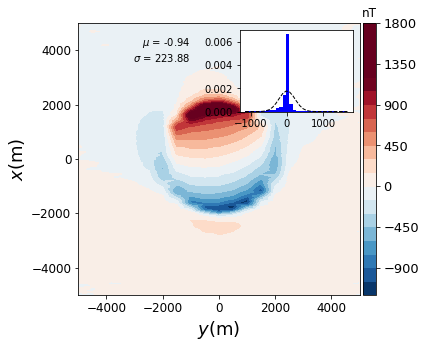

In [92]:
plt.figure(figsize=(6,5))
ax=mpl.subplot(1,1,1)
#plt.title('Residual', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.min(di['results'][30][-2]), vmax=np.min(di['results'][30][-2])*(-1))
plt.tricontourf(di['y'], di['x'], di['results'][30][-2], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=18)
plt.ylabel('$x$(m)', fontsize=18)
plt.xlim(np.min(di['x']), np.max(di['x']))
plt.ylim(np.min(di['y']), np.max(di['y']))
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.set_title('nT')
clb.ax.tick_params(labelsize=13)
inset = inset_axes(ax, width="40%", height="30%", loc=1, borderpad=0.7)
mean = np.mean(di['results'][30][-2])
std = np.std(di['results'][30][-2])
nbins=30
n, bins, patches = plt.hist(di['results'][30][-2],bins=nbins, normed=True, facecolor='blue')
plt.text(0.4, 0.96, "$\mu$ = {:.2f}\n$\sigma$ = {:.2f}".format(mean, std), 
         horizontalalignment='right',
         verticalalignment='top',
         transform = ax.transAxes, fontsize=10)
gauss = normpdf(bins, mean, std)
plt.plot(bins, gauss, 'k--', linewidth=1., label='Gaussian')
#mpl.m2km()
plt.savefig(mypath+'kimberlite_tfa_residual.png', dpi=300, bbox_inches="tight")
#plt.show()
#img(filename=mypath+'kimberlite_tfa_residual.png', width=1600, height=400)

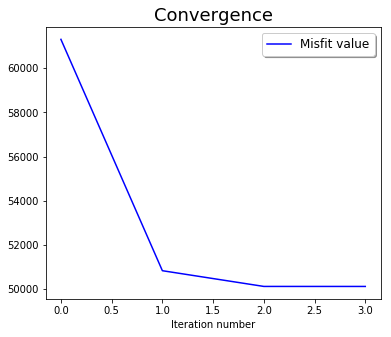

In [93]:
plt.figure(figsize=(6,5))
plt.title('Convergence', fontsize = 18)
plt.xlabel('Iteration number')
plt.plot(di['results'][30][3], 'b-', label='Misfit value')
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1)
plt.show()

In [94]:
verts35 = mfun.plot_prisms(di['results'][30][2])

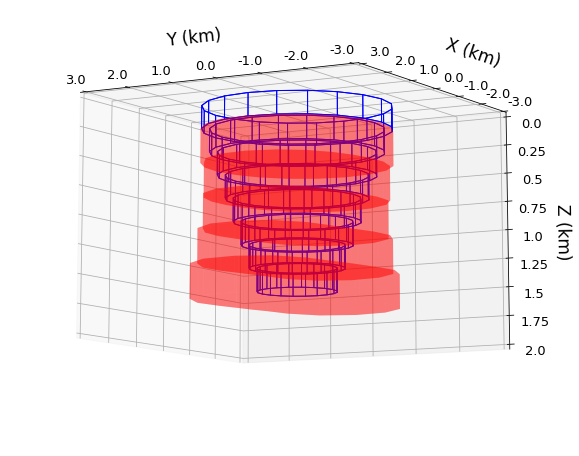

In [95]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts_true, 
alpha=0, facecolor='b', linewidths=1., edgecolors='b'))
ax.add_collection3d(Poly3DCollection(verts35, alpha=0.3, 
 facecolor='r', linewidths=0, edgecolors='r'))

ax.set_xlim(-3000, 3000, 100)
ax.set_ylim(-3000, 3000, 100)
ax.set_zlim(2000, 0, 100)
ax.tick_params(labelsize= 13, pad=8)
ax.set_xlabel('Y (km)', fontsize= 17)
ax.set_ylabel('X (km)', fontsize= 17)
ax.set_zlabel('Z (km)', fontsize= 17)
ax.set_xticklabels(np.linspace(-3, 3, 7))
ax.set_yticklabels(np.linspace(-3, 3, 7))
ax.set_zticklabels(np.linspace(0, 2, 9))
ax.yaxis.labelpad=13
ax.zaxis.labelpad=13
ax.xaxis.labelpad=13
ax.view_init(-10, 120)
ax.autoscale_view()

plt.show()